<a href="https://colab.research.google.com/github/Sdsatish/Data_Science_Internship_at-LetsGrowMore/blob/main/photo_to_sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import requests
import os

# Make a folder to hold our images called "images" if it doesn't already exist
!mkdir -p ./images

# To add the image we will be using to this lab to the folder
if not os.path.isfile("/content/kiara-final.jpg"):
    r = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/transform-photos-to-sketches-and-paintings-with-opencv/images/LandscapePhotograph.jpeg")
    f = open("./images/LandscapePhotograph.jpeg", mode = "wb+")
    f.write(r.content)
    f.close()

In [64]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2

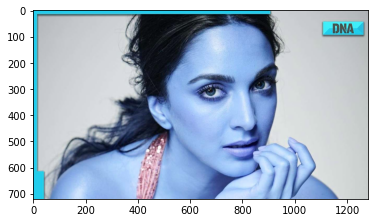

In [65]:
img = cv2.imread("/content/kiara-final.jpg") 
plt.imshow(img)

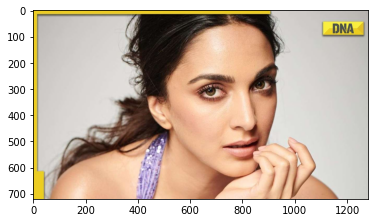

In [66]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

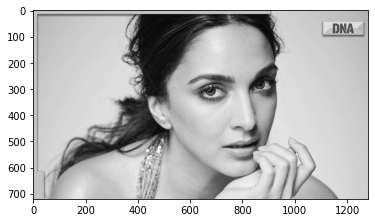

In [67]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')

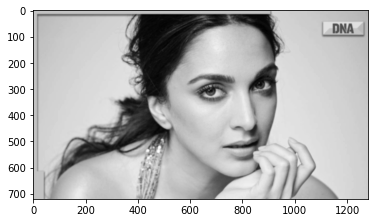

In [68]:
blur = cv2.GaussianBlur(gray,(5,5),2)
plt.imshow(blur, cmap = 'gray')

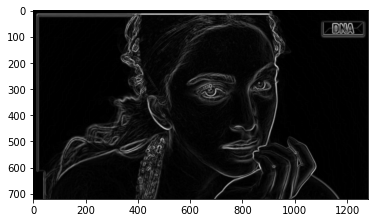

In [69]:
sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=5) # Change in horizonal direction, dx
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=5) # Change in verticle direction, dy
gradmag_sq = np.square(sobelx)+np.square(sobely) # Square the images element-wise and then add them together 
gradmag = np.sqrt(gradmag_sq) # Take the square root of the resulting image element-wise to get the gradient magnitude

plt.imshow(gradmag, cmap ='gray')

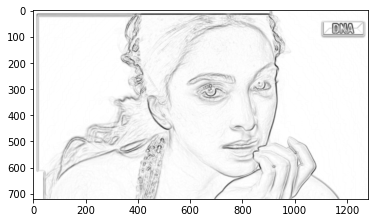

In [70]:
gradmag_inv = 255-gradmag # Reverse the colors in the image
plt.imshow(gradmag_inv, cmap = "gray")

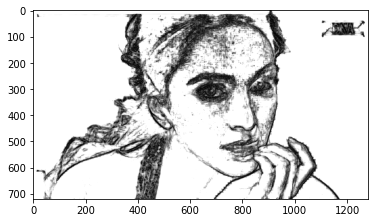

In [71]:
pencilsketch_gray, pencilsketch_color  = cv2.pencilSketch(img_rgb, sigma_s=60, sigma_r=0.07, shade_factor=0.05) 

plt.imshow(pencilsketch_gray, cmap ='gray') # To plot the black and white pencil sketch

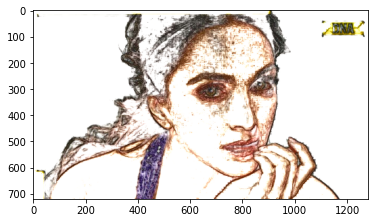

In [72]:
plt.imshow(pencilsketch_color) # To plot the colored sketch

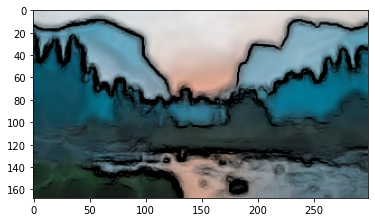

In [62]:
waterpainting = cv2.stylization(img_rgb, sigma_s=3, sigma_r=3)
plt.imshow(waterpainting)

In [16]:
from skimage import data

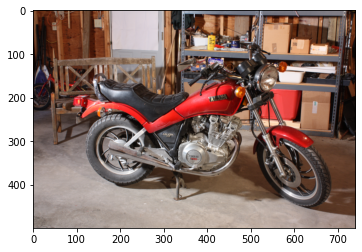

In [17]:
motorcycle = data.stereo_motorcycle()[0] #calling data.stereo_motorcycle() gives us a tuple with 2 motercycle images, we will just use the first one
plt.imshow(motorcycle)

# New Section